## To do:

Good work! Before we can finalize this, we need to address the following:

* Correct the error to do with the start date
* Eliminate all "fluff" so that the number of lines of code is a minimum. There should only be 4 lines of code that are not inside functions, namely

1. Load the datafile
2. Specify the column name (can be 2 lines if you want to specify the depth separately, as you do)
3. Specify the year
4. Call the function

* The function call should produce a plot and not return anything
* Organize the workbook, so that you first have the imports, then have all the functions, then have the lines of code above outside of functions.

Who is doing what, says Andrew!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import saveload as sl
import pandas as pd
from datetime import datetime, timedelta 

In [2]:
def GetThawDate(ts,year):
    AnnualTemp=ts[str(year)]
    Thawed=AnnualTemp[AnnualTemp>=0]
    thawdate=Thawed.index[0]
    return thawdate

In [3]:
depth='002'
#002 005 010 020 050 100
column='SoilTemp_'+depth+'cmNW'
year=2006


In [4]:
# Load dataframe of Temperature at different depths:
df=sl.load('../../data/OJP/OJP_NW_T.pkl')
print(df)

                     SoilTemp_002cmNW  SoilTemp_005cmNW  SoilTemp_010cmNW  \
1997-07-04 17:30:00           15.0110           14.2020           13.6190   
1997-07-04 18:00:00           14.7910           14.2130           13.6150   
1997-07-04 18:30:00           14.8320           14.3360           13.7370   
1997-07-04 19:00:00           14.4550           14.1780           13.6200   
1997-07-04 19:30:00           14.4170           14.2590           13.7830   
1997-07-04 20:00:00           14.3260           14.1960           13.7810   
1997-07-04 20:30:00           14.3530           14.1820           13.7880   
1997-07-04 21:00:00           14.1380           14.1220           13.7270   
1997-07-04 21:30:00           13.8110           14.0880           13.7460   
1997-07-04 22:00:00           13.6150           14.0180           13.7370   
1997-07-04 22:30:00           13.4680           13.9080           13.6840   
1997-07-04 23:00:00           13.1680           13.7960           13.6290   

In [5]:
# Extract a time series from a single column
ts=df.iloc[:,0]

In [6]:
thawdate=GetThawDate(ts,year)
thawdate

Timestamp('2006-04-05 13:30:00')

In [7]:
def TemFun (df,ts,year,column):
    thawdate=GetThawDate(ts,year)
    end=thawdate+timedelta(days = 30) 
    start=thawdate+timedelta(days = -7)
    Temp=df[start:end]
    plt.plot(Temp[column],label='')
    plt.xlabel("Time (days)")    
    plt.ylabel("Depth (meter)")
    #return Temp

/Users/ani378/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


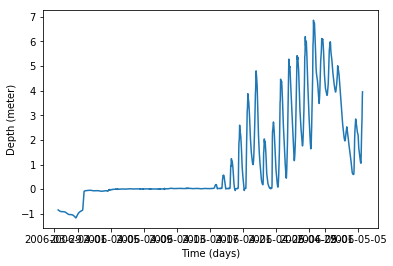

In [8]:
Temp=TemFun(df,ts,year,column)
#plt.plot(Temp['SoilTemp_002cmNW'])
#plt.plot(Temp)